### This notebook computes the following:

1. Returns
2. Annualized returns
3. Average return over the whole time period of the dataset
4. Monthly returns
5. Annualized volatility
6. Max drawdown
7. Semi-deviation
8. Historic VaR
9. Parametric Gaussian VaR
10. Cornish-Fisher VaR
11. CVaR
12. Skewness
13. Kurtosis

In [1]:
import pandas as pd
import numpy as np

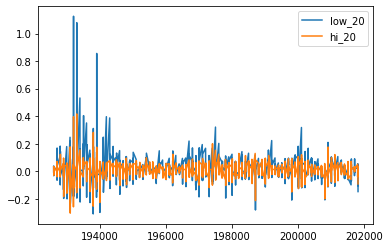

In [24]:
'''
- read file
- select only the columns of interest
- rename columns
- divide each column by 100 to get percentage
- create a line plot
'''


data = pd.read_csv('Portfolios_Formed_on_ME_monthly_EW.csv', 
                      header = 0, 
                      index_col = 0, 
                      parse_dates = True)

returns = data[['Lo 20', 'Hi 20']]
returns.columns = ['low_20', 'hi_20']
returns = returns / 100
returns.plot.line()

In [25]:
data.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-99.99,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,-99.99,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,-99.99,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,-99.99,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,-99.99,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [26]:
returns.head()

,low_20,hi_20
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [27]:
'''
getting to the desirable datetime format
- get the index
- convert the index to datetime and assign that back to the index
- change it to a period instead of a date
'''
print(returns.index)

returns.index = pd.to_datetime(returns.index, format = '%Y%m')

print(returns.index)

returns.index = returns.index.to_period('M')

print(returns.index)


Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)
DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)
PeriodIndex(['1926-07', '1926-08', '1926-09', '1926-10', '1926-11', '1926-12',
             '1927-01', '1927-02', '1927-03', '1927-04',
             ...
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08',
             '2018-09', '2018-10', '2018-11', '2018-

In [5]:
'''
- get mean of each column
- get standard deviation of each column
- get compounded return on each column
'''

returns.mean()
returns.std()
(returns + 1).prod() - 1

low_20    482560.492968
hi_20       5937.101622
dtype: float64

In [13]:
'''
annualization
- annualized volatility - multiplied by sqrt(12) because it is monthly data
- monthly return over the whole period
- annualized returns
'''

number_of_months = returns.shape[0]

annualized_volatility = returns.std()*np.sqrt(12)
returns_per_month = (returns + 1).prod()**(1 / number_of_months)
annualized_returns = returns_per_month**12 - 1
print(annualized_returns)
print(annualized_volatility)

low_20    0.151977
hi_20     0.098490
dtype: float64
low_20    0.336701
hi_20     0.195116
dtype: float64


In [28]:
# subset the data between 1999 and 2015 both inclusive

returns_1999_2015 = returns.loc['1999-01':'2015-12']

returns_1999_2015.shape

(204, 2)

In [29]:
# returns.mean()
# returns.std()
# (returns + 1).prod() - 1

number_of_months_1999_2015 = returns_1999_2015.shape[0]

annualized_volatility_1999_2015 = returns_1999_2015.std()*np.sqrt(12)
returns_per_month_1999_2015 = (returns_1999_2015 + 1).prod()**(1 / number_of_months_1999_2015)
annualized_returns_1999_2015 = returns_per_month_1999_2015**12 - 1
print(annualized_returns_1999_2015)
print(annualized_volatility_1999_2015)


low_20    0.114426
hi_20     0.062865
dtype: float64
low_20    0.228894
hi_20     0.172713
dtype: float64


Compute maximum drawdown

1. Convert the time series of returns to a time series that represents a wealth index
2. Compute a time series of the previous peaks
3. Compute the Drawdown as the difference between the previous peak and the current value
4. Get the minimum value of the drawdown

In [ ]:
wealth_index = 1000*(1+rets["LargeCap"]).cumprod()
wealth_index.plot()

In [ ]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

In [ ]:
drawdown = (wealth_index - previous_peaks)/previous_peaks
drawdown.plot()

In [ ]:
drawdown.min()

In [ ]:
# get the drawdown from a certain period onwards

drawdown["1975":].min()

Create a user-defined function for drawdown

In [31]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

In [34]:
'''
- get the max drawdown
- get the period of the max drawdown
'''
print(drawdown(returns_1999_2015["low_20"]).min())
print(drawdown(returns_1999_2015["low_20"]).idxmin())

print(drawdown(returns_1999_2015["hi_20"]).min())
print(drawdown(returns_1999_2015["hi_20"]).idxmin())


Wealth           1034.189842
Previous Peak    1111.400000
Drawdown           -0.624809
dtype: float64
Wealth           1999-03
Previous Peak    1999-01
Drawdown         2009-02
dtype: period[M]
Wealth            721.706638
Previous Peak    1015.300000
Drawdown           -0.552735
dtype: float64
Wealth           2002-09
Previous Peak    1999-01
Drawdown         2009-02
dtype: period[M]


### Bring in EDHEC global funds indices data

In [35]:
funds_data = pd.read_csv('data/edhec-hedgefundindices.csv', 
                      header = 0, 
                      index_col = 0, 
                      parse_dates = True)

funds_data.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01-31,1.19,3.93,1.78,7.91,1.89,2.13,1.91,5.73,2.81,1.50,1.80,-1.66,3.17
1997-02-28,1.23,2.98,1.22,5.25,1.01,0.84,1.22,1.75,-0.06,0.34,1.18,4.26,1.06
1997-03-31,0.78,-0.21,-0.12,-1.20,0.16,-0.23,1.09,-1.19,-0.84,0.60,0.10,7.78,-0.77
1997-04-30,0.86,-1.70,0.30,1.19,1.19,-0.05,1.30,1.72,0.84,-0.01,1.22,-1.29,0.09
1997-05-31,1.56,-0.15,2.33,3.15,1.89,3.46,1.18,1.08,3.94,1.97,1.73,-7.37,2.75


In [36]:
# converting from dates to periods

funds_data.index = funds_data.index.to_period('M')

print(funds_data.index)


PeriodIndex(['1997-01', '1997-02', '1997-03', '1997-04', '1997-05', '1997-06',
             '1997-07', '1997-08', '1997-09', '1997-10',
             ...
             '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
             '2018-08', '2018-09', '2018-10', '2018-11'],
            dtype='period[M]', name='date', length=263, freq='M')


In [38]:
# subset the funds_data between 2009 and 2018 both inclusive

funds_2009_2018 = funds_data.loc['2009-01':'2018-11']

funds_2009_2018.shape

(119, 13)

Compute Semi-Deviation

In [39]:
def semideviation(r):
    """
    Returns the semideviation aka negative semideviation of r
    r must be a Series or a DataFrame, else raises a TypeError
    """
    is_negative = r < 0
    return r[is_negative].std(ddof=0)

In [47]:
semideviation(funds_2009_2018).sort_values()

Fixed Income Arbitrage    0.332054
Merger Arbitrage          0.361121
Global Macro              0.507508
Equity Market Neutral     0.518610
Relative Value            0.571123
Convertible Arbitrage     0.668103
Funds Of Funds            0.794842
Distressed Securities     0.949845
Event Driven              1.013464
CTA Global                1.099578
Long/Short Equity         1.213857
Emerging Markets          1.527598
Short Selling             2.124006
dtype: float64

VaR and CVaR

Three different ways to compute Value At Risk

1. Historic VaR
2. Parametric Gaussian VaR
3. odified (Cornish-Fisher) VaR

To compute the historic VaR at a certain level, say 5%, find the number such that 5% of the returns fall below that number and 95% of the returns fall above that number. In other words, we want the 5 percentile return.

In [ ]:
def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

### Deviation from Normality

In [44]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [48]:
skewness(funds_2009_2018).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [58]:
import scipy.stats

scipy.stats.kurtosis(funds_2009_2018)

array([ 3.77573087, -0.40891269,  0.31972474,  1.40163604,  2.071677  ,
        0.62061708,  3.40694074,  0.16436172,  1.11571306, -0.28476219,
        1.51248205,  1.17583189,  0.81613169])

In [59]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

In [61]:
(kurtosis(funds_2009_2018) - 3).sort_values()

CTA Global               -0.408913
Merger Arbitrage         -0.284762
Global Macro              0.164362
Distressed Securities     0.319725
Event Driven              0.620617
Funds Of Funds            0.816132
Long/Short Equity         1.115713
Short Selling             1.175832
Emerging Markets          1.401636
Relative Value            1.512482
Equity Market Neutral     2.071677
Fixed Income Arbitrage    3.406941
Convertible Arbitrage     3.775731
dtype: float64